In [1]:
import fundamentalanalysis as fa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import datetime
import statistics as st
from matplotlib.pyplot import figure

%matplotlib inline 

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# api_key = '00ef9804fcde0edd93b1b4821ee2f06a'
api_key = 'c81352430e2fe3c941faf0814227562b'

data

In [4]:

''' Колонки '''
ticker = 'TWOU'
# ticker = 'AAPL'



''' для фильтрации'''
filt_start_date = '1999'
filt_finish_date = '2022'


''' время '''
stime=f'{str(int(filt_start_date)-1)}-01-01'
ftime='2023-02-01'
period = '1mo'  # '1d' '1wk'

ticker and stock data

In [5]:
def get_data_from_ticker(tick, stime, ftime, interval=period):
    ticker = yf.Ticker(tick)

    df = ticker.history(start=stime, end=ftime, interval=interval)
    x = pd.DataFrame(df)
    x.rename(columns={"Close": tick}, inplace=True)
    z = x.drop(columns=["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"])
    return z

df = get_data_from_ticker(ticker, stime, None, period)
df_market = get_data_from_ticker('^GSPC', stime, None, period)
df.tail(3)

TWOU
Date                            
2022-12-01 00:00:00-05:00   6.27
2023-01-01 00:00:00-05:00   8.63
2023-02-01 00:00:00-05:00  10.73

change index to add in metriks df

In [6]:
def change_index(df):
    df_index = df.index.to_list()
    for i in range(len(df_index)):
        t = df_index[i].date()
        df_index[i] = t.strftime('%Y-%m-%d')
    df['Date_index'] = df_index
    df = df.set_index('Date_index')
    return df

df = change_index(df)
df_market  = change_index(df_market)
df.head(3)

TWOU
Date_index           
2014-04-01  14.920000
2014-05-01  14.440000
2014-06-01  16.809999

key_metrics

In [7]:
key_metrics = fa.key_metrics(ticker, api_key, period='annual')
df_key_metr = key_metrics.T
df_key_metr.head(3)

period revenuePerShare netIncomePerShare operatingCashFlowPerShare freeCashFlowPerShare cashPerShare bookValuePerShare tangibleBookValuePerShare shareholdersEquityPerShare interestDebtPerShare          marketCap    enterpriseValue    peRatio priceToSalesRatio  pocfratio   pfcfRatio   pbRatio  ptbRatio evToSales enterpriseValueOverEBITDA evToOperatingCashFlow evToFreeCashFlow earningsYield freeCashFlowYield debtToEquity debtToAssets netDebtToEBITDA currentRatio interestCoverage incomeQuality dividendYield payoutRatio salesGeneralAndAdministrativeToRevenue researchAndDdevelopementToRevenue intangiblesToTotalAssets capexToOperatingCashFlow capexToRevenue capexToDepreciation stockBasedCompensationToRevenue grahamNumber      roic returnOnTangibleAssets grahamNetNet workingCapital tangibleAssetValue netCurrentAssetValue investedCapital averageReceivables averagePayables averageInventory daysSalesOutstanding daysPayablesOutstanding daysOfInventoryOnHand receivablesTurnover  \
2022     FY       12.454504         -4.166041                  0.141307            -0.010708     2.166335          6.485581                -10.123895                   6.485581            14.282254          630995256         1505659256  -1.958694          0.655185  57.746431 -762.071565  1.258176  1.258176  1.563379                -11.505791            137.792556     -1818.429053     -0.510544         -0.001312     2.050329     0.723051       -6.683917     1.155255        -4.148375     -0.033919          None           0                               0.165529                          0.197774                 0.709263                -1.075776      -0.012206           -0.091726                        0.083295    24.656275 -0.168533              -0.611891    -14.01325       43315000         -782859000           -987036000        2.078063           97892500       121702500             None            29.415116                    None                  None           12.408586   
2021     FY       12.680082           -2.6115                 -0.242343             -1.18541     3.123245         11.117642                 -8.995789                  11.117642             13.48468  1089615457.775965  1811150457.775965  -5.594485          1.152201 -60.286348  -12.324851  1.314128  1.314128  1.915179                 -49.90495           -100.207506       -20.486273     -0.178747         -0.081137     1.134266      0.60685      -19.881379     1.180941        -3.268869      0.092799          None           0                               0.220579                          0.189346                 0.711265                 3.891446      -0.074374            -0.64855                        0.103381    25.558929 -0.094305              -0.319842   -13.064803       60345000         -670907000           -885999000        1.151132          107448500        91676500             None            37.332835               67.708574                     0            9.776916   
2020     FY       11.535577         -3.224224                   0.44091            -0.591231     7.456163          14.01472                   3.16325                   14.01472             5.812105  2746147819.114464  2608443819.114464 -12.685223          3.545553  92.762729  -69.177717   2.91836   2.91836  3.367763                -27.686959             88.111195        -65.70884     -0.078832         -0.014456     0.375032     0.390655         1.46164     2.548277        -6.550317     -0.136749          None           0                                0.22404                          0.201346                 0.471811                -2.340934      -0.089475           -0.718376                        0.105924    31.885709 -0.136916              -0.265408     -1.01183      367513000          212390000              1608000        0.385684           82224000        77847000             None            21.808115               34.825164                     0           16.736889   

     payablesTurnover inventoryTurnover       ro

In [8]:
df_key_metr = df_key_metr.loc[filt_finish_date:filt_start_date].copy(deep=True)
index_years = df_key_metr.index.to_list()

In [9]:
def get_price_from_df(df, list_dates):
    new_list = []
    for i in range(len(list_dates)):
        x = int(list_dates[i])
        x += 1
        x = str(x)
        r = df.loc[f'{x}-01-01']
        r = float(r)
        new_list.append(r)
        
    return new_list
        
stock_year_prices = get_price_from_df(df, index_years)
stock_year_market_prices = get_price_from_df(df_market, index_years)

In [10]:
df_key_metr[ticker] = list(stock_year_prices)
df_key_metr['SNP'] = list(stock_year_market_prices)
df_key_metr.drop('period', axis=1, inplace=True)

add_percent_columns

In [11]:
def change_percent_all_columns(df):
    x = df.columns.to_list()
    for i in range(len(x)):
        v = df[x[i]].to_list()
        l = []
        for y in range(len(v)):
            try:
                # if y != len(v):
                #     vv = (v[y] / (v[y+1] / 100)) - 100
                #     l.append(vv)
                #     # print(vv)
                if y != len(v):
                    if v[y] < 0 and v[y+1] > 0:
                        l.append('Minus')
                    elif v[y] > 0 and v[y+1] < 0:
                        l.append('Plus')
                    else:
                        vv = (v[y] / (v[y+1] / 100)) - 100
                        l.append(vv)  
                else:
                    vv = 0
                    l.append(vv)
                    # print(vv)
            except:
                l.append(0)
        df[f'change % {x[i]}'] = l
    return df

df_with_changes_key = change_percent_all_columns(df_key_metr)

Vizualization key_metrics

In [12]:
df_with_changes_key = df_with_changes_key.reindex(index=df_with_changes_key.index[::-1])

In [13]:
''' necessary columns '''

km0 = f'{ticker}'
km1 = f'change % {ticker}'
km2 = 'SNP'
km3 = 'change % SNP'
km4 = 'change % debtToAssets'

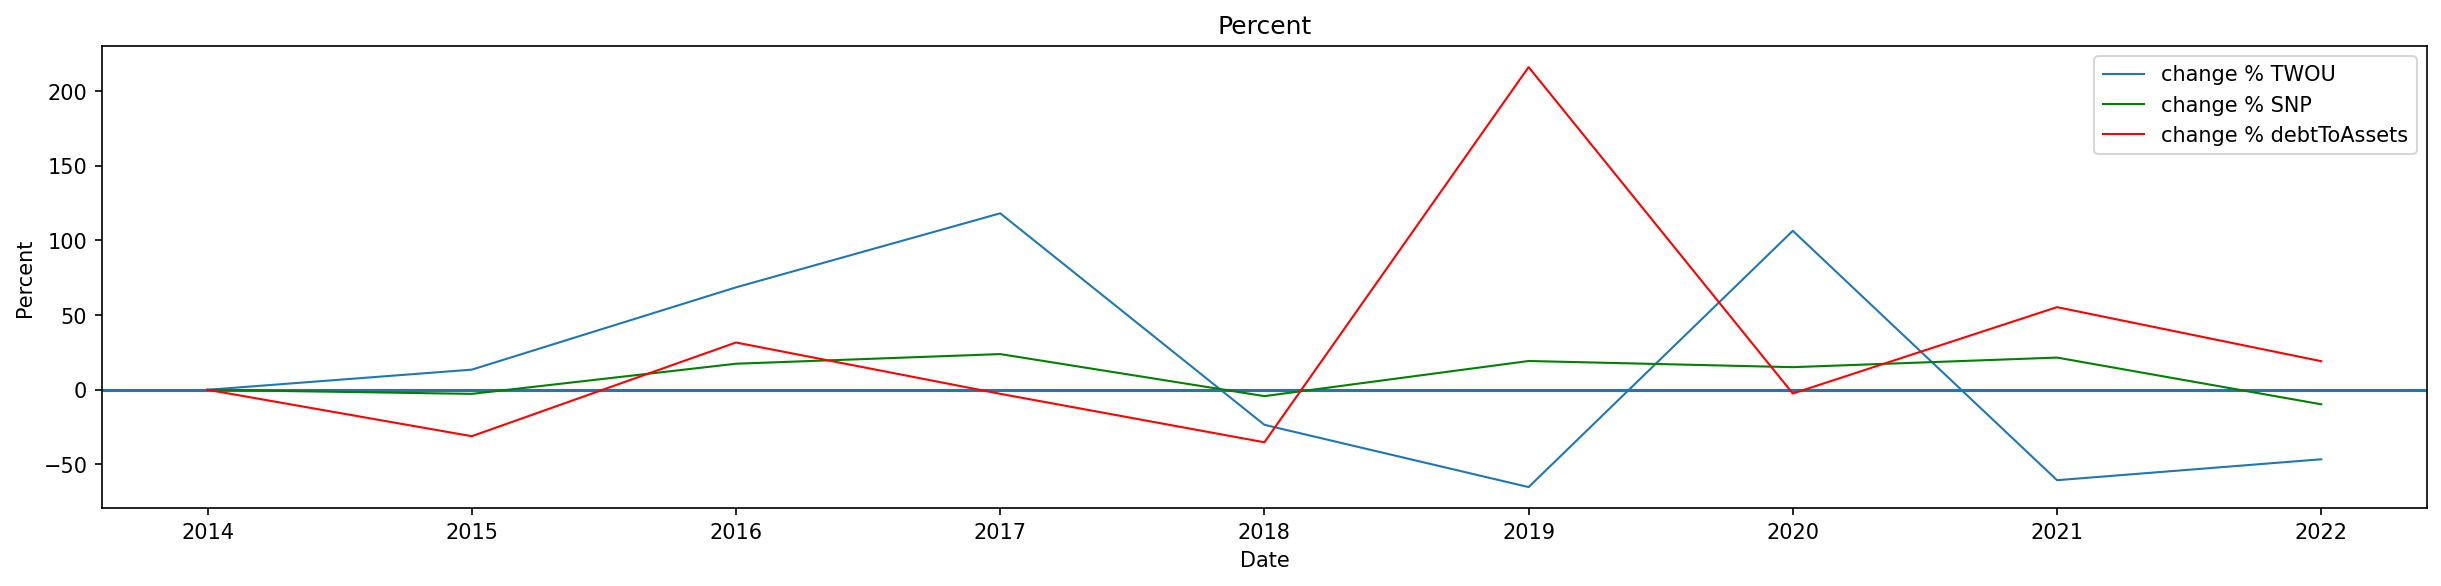

In [14]:
# plot size
figure(figsize=(20,4), dpi=150)
plt.axhline(y=0, linestyle='-')


# Set the title and axis labels
plt.title('Percent')
plt.xlabel('Date')
plt.ylabel('Percent')


# Plot 
plt.plot(df_with_changes_key[km1],lw=1, label=km1)
plt.plot(df_with_changes_key[km3],'g',lw=1, label=km3)
plt.plot(df_with_changes_key[km4],'r',lw=1, label=km4)

# Add a legend to the axis
plt.legend()

plt.show()